# ISYE 6740 - Computational Data Analysis, Spring 2021
## Homework 5 
## Student: Homayoun Gerami

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import coo_matrix
from scipy.spatial.distance import cdist
from sklearn.utils.graph import graph_shortest_path
from sklearn.neighbors import kneighbors_graph
from sklearn.model_selection import train_test_split
import networkx as nx
from IPython.core.display import display, HTML
import warnings
import scipy.io
warnings.filterwarnings('ignore')
import seaborn as sns

In [93]:
Marriage_data = pd.read_csv('marriage.csv', header=None)

## 1.  Comparing classifiers.  (65 points)
### In  lectures,  we  learn  different  classifiers.   This  question  is  compare  them  on  two  datasets.   Python  users,please  feel  free  to  useScikit-learn,  which  is  a  commonly-used  and  powerfulPythonlibrary  with  variousmachine  learning  tools.   But  you  can  also  use  other  similar  libraries  in  other  languages  of  your  choice  toperform the tasks.

### 1.  Part One (Divorce classification/prediction).  (30 points)
#### This dataset is about participants who completed the personal information form and a divorce predictors scale.  The data is a modified version of the publicly available at https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set (by injecting noise so you will not get the exactly same  results  as  on  UCI  website). The dataset marriage.csv is  contained  in  the  homework  folder. There are 170 participants and 54 attributes (or predictor variables) that are all real-valued.  The last column of the CSV file is labely(1 means “divorce”, 0 means “no divorce”).  Each column is for one eature (predictor variable), and each row is a sample (participant).  A detailed explanation for eachfeature (predictor variable) can be found at the website link above.  Our goal is to build a classifier using training data, such that given a test sample, we can classify (or essentially predict) whether its label is 0 (“no divorce”) or 1 (“divorce”).
#### We are going to compare the following classifiers (Naive Bayes, Logistic Regression, and KNN).Use the first 80% data for training and the remaining 20% for testing.  If you use scikit-learn you can use train_test_split to split the dataset. Remark: Please note that, here, for Naive Bayes, this means that we have to estimate the variance foreach individual feature from training data. When estimating the variance, if the variance is zero toclose to zero (meaning that there is very little variability in the feature), you can set the variance to be a small number, e.g., $\epsilon=10^{-3}$ . We do not want to have include zero or nearly variance in Naive Bayes. This tip holds for both Part One and Part Two of this question.

#### (a)  (15 points) Report testing accuracy for each of the three classifiers.  Comment on their performance:  which performs the best and make a guess why they perform the best in this setting.
#### (b)  (15 points) Now perform PCA to project the data into two-dimensional space.  Build the classifiers(Naive Bayes, Logistic Regression, and KNN) using the two-dimensional PCA results.  Plot the data points and decision boundary of each classifier in the two-dimensional space.  Comment on the difference between the decision boundary for the three classifiers.  Please clearly representthe data points with different labels using different colors.

In [11]:
display(Marriage_data)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0
3,3.553458,2.859042,2.928414,1.833241,1.271119,4.165213,2.078597,4.506175,2.521628,2.747315,...,3.196291,2.204824,3.664982,3.689508,2.577677,3.171884,2.164660,1.813024,1.376033,1.0
4,0.506547,1.419223,1.716153,1.319274,2.853840,0.047412,-0.016515,0.620795,1.202992,0.078347,...,1.806657,2.085539,2.012551,1.899477,1.510134,1.373350,2.551119,0.846321,-0.066858,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,-1.845462,-0.808531,0.309481,-0.979520,-0.556496,-0.395338,-0.502979,-0.798474,-1.473114,2.428689,...,1.021530,-0.108714,2.308311,-0.287032,0.046402,4.702990,4.814076,2.510736,2.225078,0.0
166,0.337077,-0.483750,0.823365,0.563178,-1.270118,0.978814,-1.027141,-0.581733,-1.338374,0.463138,...,3.182008,3.265522,2.005206,1.943546,4.070406,2.555771,4.383673,1.294633,2.477147,0.0
167,2.304462,1.844857,-0.095230,-0.405619,1.179862,1.226855,1.384235,-0.206427,1.973713,1.940605,...,1.907090,0.239489,1.249397,-0.077476,1.429052,-0.067223,5.132404,-0.871550,-0.637281,0.0
168,0.369439,0.063279,-0.466090,0.017346,-1.197056,0.038995,1.735441,1.037408,0.183137,0.333348,...,2.893040,4.305077,4.685423,1.695163,1.297874,2.588636,4.544230,3.209139,0.094538,0.0


In [12]:
X = Marriage_data.iloc[:,:-1]
y = Marriage_data.iloc[:,-1]

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

### Naive Bayes Classifier

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
nb_model = GaussianNB(var_smoothing=1e-03)

In [16]:
nb_model.fit(X_train,y_train)

GaussianNB(var_smoothing=0.001)

In [17]:
nb_accuracy = accuracy_score(y_test, nb_model.predict(X_test))

In [18]:
confusion_matrix(y_test, nb_model.predict(X_test))

array([[16,  0],
       [ 1, 17]], dtype=int64)

### Logistic Regression

In [19]:
lr_model = LogisticRegression(penalty='none')

In [20]:
lr_model.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [21]:
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test))

In [22]:
confusion_matrix(y_test, lr_model.predict(X_test))

array([[15,  1],
       [ 1, 17]], dtype=int64)

### K-Nearest Neighbors

In [23]:
knn_model = KNeighborsClassifier()

In [24]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test))

In [26]:
confusion_matrix(y_test, knn_model.predict(X_test))

array([[16,  0],
       [ 1, 17]], dtype=int64)

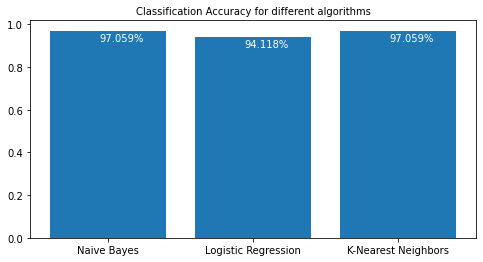

In [27]:
accuracies = {'Naive Bayes':nb_accuracy, 'Logistic Regression':lr_accuracy, 'K-Nearest Neighbors':knn_accuracy}
plt.figure(figsize=(8,4))
plt.bar(accuracies.keys(),accuracies.values())
for i, v in enumerate(accuracies.values()):
    plt.text(i-0.06, v-0.05, str(np.round(v,5)*100)+'%', color='w')
plt.title('Classification Accuracy for different algorithms', size=10);

#### I used random split number, using all the features for classifications. Naive Base and KNN models outperformed the Logistic Regression, maybe becasue I didn't define any penalty for the Logistic model.

### PCA applied, Naive Bayes Classifier

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [30]:
X_test_pca = pca.transform(X_test)

In [31]:
nb_pca = GaussianNB(var_smoothing=1e-03)
nb_pca.fit(X_train_pca, y_train)

GaussianNB(var_smoothing=0.001)

In [32]:
nb_pca_accuracy = accuracy_score(y_test, nb_pca.predict(X_test_pca))

In [33]:
confusion_matrix(y_test, nb_pca.predict(X_test_pca))

array([[16,  0],
       [ 1, 17]], dtype=int64)

### PCA applied, Logistic Regression

In [34]:
lr_pca = LogisticRegression(penalty='none')
lr_pca.fit(X_train_pca, y_train)

LogisticRegression(penalty='none')

In [35]:
lr_pca_accuracy = accuracy_score(y_test, lr_pca.predict(X_test_pca))

In [36]:
confusion_matrix(y_test, lr_pca.predict(X_test_pca))

array([[16,  0],
       [ 0, 18]], dtype=int64)

### PCA applied, K-Nearest Neighbors

In [37]:
knn_pca = KNeighborsClassifier()

In [38]:
knn_pca.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [39]:
knn_pca_accuracy = accuracy_score(y_test, knn_pca.predict(X_test_pca))

In [40]:
confusion_matrix(y_test, knn_pca.predict(X_test_pca))

array([[16,  0],
       [ 1, 17]], dtype=int64)

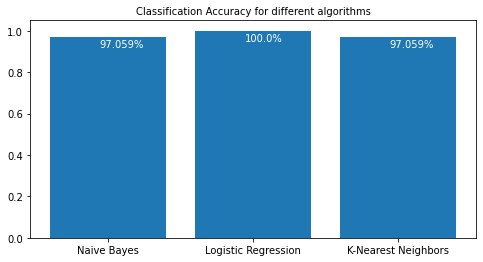

In [41]:
accuracies = {'Naive Bayes':nb_pca_accuracy, 'Logistic Regression':lr_pca_accuracy, 'K-Nearest Neighbors':knn_pca_accuracy}
plt.figure(figsize=(8,4))
plt.bar(accuracies.keys(),accuracies.values())
for i, v in enumerate(accuracies.values()):
    plt.text(i-0.06, v-0.05, str(np.round(v,5)*100)+'%', color='w')
plt.title('Classification Accuracy for different algorithms', size=10);

#### After applying PCA, and using two attributes only, Logistic regression outperformed the other two, while the accuracy of Naive Bayes and KNN remained the same.   

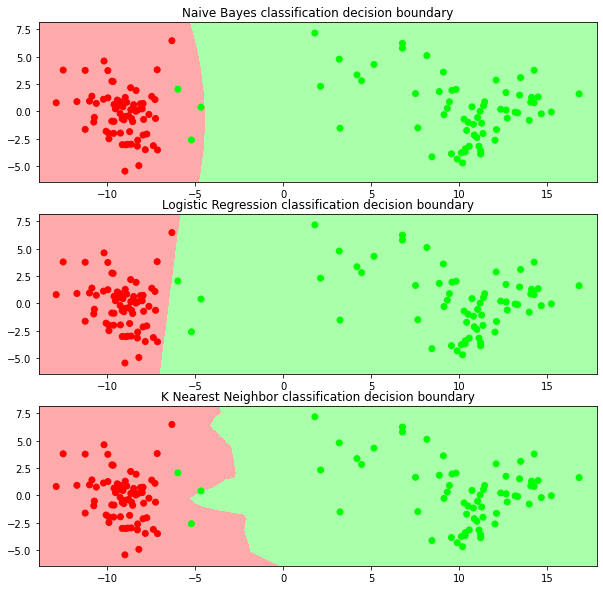

In [42]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

chart_names = ['Naive Bayes', 'Logistic Regression', 'K Nearest Neighbor']
fig, axs = plt.subplots(nrows=3, ncols=1, gridspec_kw={'wspace':0.2, 'hspace':0.2},
                        figsize=(10, 10))
for i, clf in enumerate([nb_pca, lr_pca, knn_pca]):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    axs[i].pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    axs[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold)
    axs[i].axis(xmin=xx.min() ,xmax=xx.max(), ymin=yy.min(), ymax=yy.max())
#     axs[i].xlim(xx.min(), xx.max())
#     axs[i].ylim(yy.min(), yy.max())
    axs[i].set_title("{} classification decision boundary".format(chart_names[i]))

plt.show() 

### 2.  Part Two (Handwritten digits classification).  (35 points)
#### This  question  is  to  compare  different  classifiers  and  their  performance  for  multi-class  classificationson  the  complete  MNIST  dataset  at http://yann.lecun.com/exdb/mnist/.   You  can  find  the  data file mnist_10digits.mat in the homework folder.  The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.  We will compare KNN, logistic regression, SVM, kernel SVM, and neural networks. 
#### • We suggest you to “standardize” the features before training the classifiers, by dividing the values of the features by 255 (thus map the range of the features from [0, 255] to [0, 1]).
#### • You may adjust the number of neighbors K used in KNN to have a reasonable result (you may use cross validation but it is not required; any reasonable tuning to get good result is acceptable).
#### • You may use a neural networks function sklearn.neural_network with hidden_layer_sizes = (20, 10).
#### • For kernel SVM, you may use radial basis function kernel, and a heuristic called “median trick”:choose the parameter of the kernel $K(x, x') = \exp\{-\|x-x'\|^2/(2\sigma^2)\}$  Choose the bandwidth as $\sigma=\sqrt{M/2}$ where $M =$ the median of $\{\|x^i-x^j\|^2, 1\leq i, j \leq m', i\neq j \}$ for pairs of training samples.  Here you can randomly choose $m'=1000$  samples from training data to use for the “median trick”.
#### • For KNN and SVM, you can randomly downsample the training data to size $m= 5000$, to improve computation efficiency.Train the classifiers on training dataset and evaluate on the test dataset.
#### (a)  (25 points) Report confusion matrix, precision, recall, and F-1 score for each of the classifiers.  For precision, recall, and F-1 score of each classifier, we will need to report these for each of the digits. So  you  can  create  a  table  for  this.   For  this  question,  each  of  the  5  classifier, KNN, logistic regression, SVM, kernel SVM, and neural networks, accounts for 10 points.


In [43]:
import scipy.io as sio

In [44]:
df  = sio.loadmat('mnist_10digits.mat')
df

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Oct 13 20:00:03 2020',
 '__version__': '1.0',
 '__globals__': [],
 'xtrain': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'ytrain': array([[5, 0, 4, ..., 5, 6, 8]], dtype=int64),
 'xtest': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'ytest': array([[7, 2, 1, ..., 4, 5, 6]], dtype=int64)}

In [45]:
x_train=df['xtrain']
len(x_train)

60000

x_train[0]

In [46]:
y_train=df['ytrain'].reshape(-1,)
x_test=df['xtest']
y_test=df['ytest'].reshape(-1,)

In [47]:
x_train = x_train/255;
x_test  = x_test/255;

In [48]:
len(y_test)

10000

#### LogisticRegression

In [50]:
LR = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)
acc_LR = sum(y_pred_LR==y_test)/len(y_test)

In [51]:
acc_LR

0.9258

#### kernel svm

In [52]:
import sklearn.metrics
import sklearn.svm
import sklearn.neural_network

In [53]:
Pair_Dist = sklearn.metrics.pairwise_distances(x_train[0:5000], x_train[0:5000])


In [54]:
### removing the zero diagonal distances from the A: 
Pair_Dist_Updated = Pair_Dist[~np.eye(Pair_Dist.shape[0],dtype=bool)]
Pair_Dist_Updated.shape

(24995000,)

In [55]:
M = 1/(np.median(Pair_Dist_Updated.ravel()) **2)
M

0.00956638915923993

In [56]:
svm_ker=sklearn.svm.SVC(kernel='rbf', random_state=0, gamma=M).fit(x_train[0:5000],y_train[0:5000])

In [57]:
y_pred_svm_ker = svm_ker.predict(x_test)

In [58]:
conf_svm_ker = confusion_matrix(y_test, y_pred_svm_ker)
conf_svm_ker

array([[ 966,    0,    1,    0,    2,    4,    5,    1,    1,    0],
       [   0, 1119,    3,    2,    0,    1,    4,    1,    5,    0],
       [   8,    2,  964,    8,   12,    0,    9,   11,   18,    0],
       [   1,    1,   13,  946,    0,   24,    1,   12,    9,    3],
       [   1,    1,    4,    0,  939,    0,    8,    3,    1,   25],
       [   6,    3,    3,   20,    8,  829,   12,    1,    6,    4],
       [   9,    3,    3,    0,    8,    5,  928,    0,    2,    0],
       [   0,   16,   19,    3,    8,    0,    0,  948,    2,   32],
       [   6,    1,    7,   16,    9,   15,    6,    5,  902,    7],
       [   6,    7,    2,   12,   35,    4,    0,   11,    7,  925]],
      dtype=int64)

Text(0.5, 1.0, 'Kernel SVM')

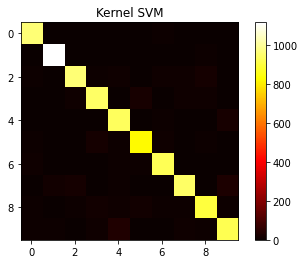

In [59]:
plt.imshow(conf_svm_ker, cmap="hot")
plt.colorbar()
plt.title('Kernel SVM') 

In [60]:
print('report the test score for Kernel SVM')
print(sklearn.metrics.classification_report(y_test, y_pred_svm_ker))

report the test score for Kernel SVM
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.94      0.94      0.94      1010
           4       0.92      0.96      0.94       982
           5       0.94      0.93      0.93       892
           6       0.95      0.97      0.96       958
           7       0.95      0.92      0.94      1028
           8       0.95      0.93      0.94       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



### linear SVM

In [61]:
svm_ker_lin=sklearn.svm.SVC(kernel='linear', random_state=0, gamma=M).fit(x_train[0:5000],y_train[0:5000])

In [62]:
y_pred_svm_ker_lin = svm_ker_lin.predict(x_test)

In [63]:
conf_svm_ker_lin = confusion_matrix(y_test, y_pred_svm_ker_lin)
conf_svm_ker_lin

array([[ 955,    0,    3,    1,    1,    6,    6,    2,    3,    3],
       [   0, 1118,    1,    3,    1,    3,    3,    0,    6,    0],
       [  11,   10,  927,   20,   15,    3,    9,   11,   24,    2],
       [   3,    3,   20,  910,    3,   32,    2,   12,   15,   10],
       [   1,    1,    9,    0,  933,    0,    5,    4,    1,   28],
       [  12,    3,    5,   42,   15,  772,   11,    2,   22,    8],
       [  13,    2,   18,    2,   17,   16,  886,    1,    3,    0],
       [   1,   15,   32,    5,   11,    3,    0,  922,    4,   35],
       [  12,    7,   21,   46,   14,   37,    8,   15,  804,   10],
       [   4,    9,    4,    8,   57,   10,    0,   36,    7,  874]],
      dtype=int64)

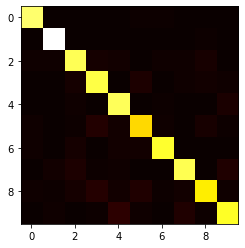

In [64]:
plt.imshow(conf_svm_ker_lin, cmap="hot")

In [65]:
print('report the test score for Linear SVM')
print(sklearn.metrics.classification_report(y_test, y_pred_svm_ker_lin))

report the test score for Linear SVM
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.89      0.90      0.89      1032
           3       0.88      0.90      0.89      1010
           4       0.87      0.95      0.91       982
           5       0.88      0.87      0.87       892
           6       0.95      0.92      0.94       958
           7       0.92      0.90      0.91      1028
           8       0.90      0.83      0.86       974
           9       0.90      0.87      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### Neural network

In [66]:
NN = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=500, random_state=0).fit(x_train,y_train)
y_pred_NN = NN.predict(x_test)

In [233]:
conf_NN = confusion_matrix(y_test, y_pred_NN)
conf_NN

array([[ 945,    0,    8,    3,    2,    4,    9,    2,    3,    4],
       [   0, 1117,    5,    2,    1,    0,    1,    3,    4,    2],
       [   3,   11,  970,    9,    8,    1,    3,   10,   14,    3],
       [   1,    3,   20,  940,    2,   21,    1,   14,    6,    2],
       [   1,    0,    4,    0,  946,    2,    8,    6,    4,   11],
       [   5,    3,    1,   16,    5,  834,    9,    9,    6,    4],
       [   8,    3,    5,    1,   10,   13,  914,    0,    3,    1],
       [   0,   11,   17,    8,    2,    3,    0,  974,    3,   10],
       [   6,    8,   12,   18,    5,   21,    2,    7,  888,    7],
       [   4,    8,    3,    4,   26,    2,    1,   14,   10,  937]],
      dtype=int64)

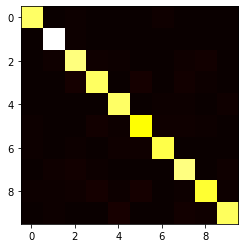

In [234]:
plt.imshow(conf_NN, cmap="hot")

In [236]:
print('report the test score for Neural Network')
print(sklearn.metrics.classification_report(y_test, y_pred_NN)) 

report the test score for Neural Network
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.94      0.93      1032
           3       0.94      0.93      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.93      0.93      0.93       892
           6       0.96      0.95      0.96       958
           7       0.94      0.95      0.94      1028
           8       0.94      0.91      0.93       974
           9       0.96      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



### KNN

In [69]:
KNN = KNeighborsClassifier(n_neighbors=4).fit(x_train[0:5000], y_train[0:5000])
y_pred_KNN = KNN.predict(x_test)

In [71]:
conf_KNN = confusion_matrix(y_test, y_pred_KNN)
conf_KNN

array([[ 969,    1,    1,    0,    0,    2,    5,    1,    1,    0],
       [   0, 1130,    1,    2,    1,    0,    1,    0,    0,    0],
       [  23,   41,  931,    7,    2,    0,    7,   17,    4,    0],
       [   4,   10,    6,  943,    1,   18,    1,   10,   11,    6],
       [   1,   24,    2,    0,  915,    0,    6,    3,    0,   31],
       [   9,    8,    0,   33,    6,  812,    9,    1,    6,    8],
       [  18,    8,    0,    0,    5,    7,  920,    0,    0,    0],
       [   1,   44,    6,    1,    7,    1,    0,  952,    0,   16],
       [  20,   10,   12,   23,   11,   27,    9,    9,  830,   23],
       [   5,    8,    2,    9,   30,    5,    2,   33,    5,  910]],
      dtype=int64)

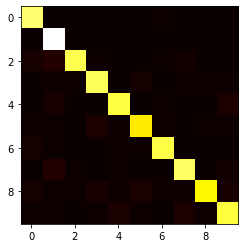

In [72]:
plt.imshow(conf_KNN, cmap="hot")

In [73]:
print('report the test score for KNN')
print(sklearn.metrics.classification_report(y_test, y_pred_KNN))

report the test score for KNN
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       980
           1       0.88      1.00      0.93      1135
           2       0.97      0.90      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.94      0.93      0.93       982
           5       0.93      0.91      0.92       892
           6       0.96      0.96      0.96       958
           7       0.93      0.93      0.93      1028
           8       0.97      0.85      0.91       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



### (b)  (10 points) Comment on the performance of the classifier and give your explanation why some of them perform better than the others.

####  Overall all the models performed well, above 90% accuracy, Neural Network and kernel SVM outperformed the rest.  

## 2. Naive Bayes for spam filtering. (35 points) 

In this problem, we will use the Naive Bayes algorithm to fit a spam filter by hand. This will enhance your understanding to Bayes classifier and build intuition. This question does not involve any programming but only derivation and hand calculation. 

Spam filters are used in all email services to classify received emails as 'Spam' or 'Not Spam'. A simple approach involves maintaining a vocabulary of words that commonly occur in 'Spam' emails and classifying an email as Spam if the number of words from the dictionary that are present in the email is over a certain threshold.
We are given the vocabulary consists of 15 words \[V=\{\textsf{secret, offer, low, price, valued, customer, today, dollar, million, sports, is, for, play, healthy, pizza}\}.\] We will use $V_i$ to represent the $i$th word in $V$. As our training dataset, we are also given 3 example spam messages,

{million dollar offer}
{secret offer today}
{secret is secret}

and 4 example non-spam messages

{low price for valued customer}
{play secret sports today}
{sports is healthy}
{low price pizza}


Recall that the Naive Bayes classifier assumes the probability of an input depends on its input feature. The feature for each sample is defined as
$x^{(i)} = [x_1^{(i)}, x_2^{(i)}, \ldots, x_d^{(i)}]^T$, $i = 1, \ldots, m$ and the class of the $i$th sample is $y^{(i)}$. In our case the length of the input vector is $d = 15$, which is equal to the number of words in the vocabulary $V$. Each entry $x_j^{(i)}$ is equal to the number of times word $V_j$ occurs in the $i$-th message. 


(5 points) Calculate class prior $\mathbb P(y = 0)$ and $\mathbb P(y = 1)$ from the training data, where $y = 0$ corresponds to spam messages, and $y = 1$ corresponds to non-spam messages. Note that these class prior essentially corresponds to the frequency of each class in the training sample. Write down the feature vectors for each spam and non-spam messages.

(15 points) In the Naive Bayes model, assuming the keywords are independent of each other (this is a simplification), the likelihood of a sentence with its feature vector $x$ given a class $c$ is given by 
$
\mathbb P (x|y = c) = \prod_{k=1}^d \theta_{c, k}^{x_k}, \quad c = \{0, 1\}$

where $0 \leq \theta_{c,k} \leq 1$ is the probability of word $k$ appearing in class $c$, which satisfies 
$\sum_{k=1}^d \theta_{c,k} = 1, \quad c = \{0, 1\}.$ Given this, the complete log-likelihood function for our training data is given by
$
\ell(\theta_{0,1}, \ldots, \theta_{0, d}, \theta_{1,1}, \ldots, \theta_{1, d}) = 
\sum_{i=1}^m \sum_{k=1}^d x_k^{(i)} \log \theta_{y^{(i)}, k}
$
(In this example, $m = 7$.)
 Calculate the maximum likelihood estimates of $\theta_{0,1}$, $\theta_{0,7}$, $\theta_{1,1}$, $\theta_{1,15}$ by maximizing the log-likelihood function above.\\
 (Hint: We are solving a constrained maximization problem and you will need to introduce Lagrangian multipliers and consider the Lagrangian function.)
(15 points) Given a test message '{today is secret}', using the Naive Bayes classier that you have trained in Part (a)-(b), to calculate the posterior and decide whether it is spam or not spam.



**1) (10 points) Calculate P(y = 0) and P(y = 1) from the training data, where y = 0 corresponds to spam messages, and y = 1 corresponds to non-spam messages.**

Using the y vector, we derive the above probabilities:

In [2]:
V = ['secret', 'offer', 'low', 'price', 'valued', 'customer', 'today', 'dollar', 'million', 'sports', 'is', 'for', 'play', 'healthy', 'pizza']

In [3]:
spam = ['million dollar offer','secret offer today','secret is secret']
no_spam = ['low price for valued customer','play secret sports today','sports is healthy','low price pizza']

In [4]:
spam_vecs = pd.DataFrame(np.zeros((len(V),len(spam))), index=V)
no_spam_vecs = pd.DataFrame(np.zeros((len(V),len(no_spam))), index=V)

In [5]:
spam_vecs

,0,1,2
secret,0.0,0.0,0.0
offer,0.0,0.0,0.0
low,0.0,0.0,0.0
price,0.0,0.0,0.0
valued,0.0,0.0,0.0
customer,0.0,0.0,0.0
today,0.0,0.0,0.0
dollar,0.0,0.0,0.0
million,0.0,0.0,0.0
sports,0.0,0.0,0.0


In [6]:
for i,s in enumerate(spam):
    for word in s.split():
        #print(spam_vecs.loc[word,i])
        spam_vecs.loc[word,i]+=1
for i,s in enumerate(no_spam):
    for word in s.split():
        no_spam_vecs.loc[word,i]+=1

In [7]:
print('Spam Vectors'),display(spam_vecs.T), print('\n Non-Spam Vectors'),display(no_spam_vecs.T)

Spam Vectors


,secret,offer,low,price,valued,customer,today,dollar,million,sports,is,for,play,healthy,pizza
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0



 Non-Spam Vectors


,secret,offer,low,price,valued,customer,today,dollar,million,sports,is,for,play,healthy,pizza
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


(None, None, None, None)

In [8]:
X_text = pd.concat((spam_vecs.T,no_spam_vecs.T), axis=0)
display(X_text)

,secret,offer,low,price,valued,customer,today,dollar,million,sports,is,for,play,healthy,pizza
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
X_text_class = np.concatenate((spam_vecs.values.T,no_spam_vecs.values.T), axis=0)
y_text_class = np.concatenate((np.zeros(3),np.ones(4)))

In [10]:
display(X_text_class)
display(y_text_class)

array([[0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

array([0., 0., 0., 1., 1., 1., 1.])

**1) (10 points) Calculate P(y = 0) and P(y = 1) from the training data, where y = 0 corresponds to spam messages, and y = 1 corresponds to non-spam messages.**

In [11]:
print(f'P(y=1) = {np.sum(y_text_class==1)}/{y_text_class.shape[0]}')
print(f'P(y=0) = {np.sum(y_text_class==0)}/{y_text_class.shape[0]}')

P(y=1) = 4/7
P(y=0) = 3/7


**2) (10 points) In the Naive Bayes model, the likelihood of a sentence with feature vector x given a class c is**

$$ P(x|y = c) = \prod^d_{k=1}{θ^{x_k}_{c,k}}$$

**where θc,k ∈ (0, 1) is the weight of word k in class c, which satisfies $\sum^n_{k=1}{θ_{c,k} = 1}, \forall{c}$. Calculate the maximum likelihood estimates of $θ_{0,1}, θ_{0,7}, θ_{1,1}, θ_{1,15}$ by maximizing $P(x|y = c)$ with respect to $θ_{c,k}$ and given data. (Hint: Consider the Lagrangian function for solving this constrained optimization problem. You only need to introduce one Lagrangian multiplier because you only have one constraint. Consider log-likelihood (i.e., taking log of the cost function). Then solve it from there.)**

The maximixation function provided as:

$$ \ell(\theta_{0,1}, \ldots, \theta_{0, d}, \theta_{1,1}, \ldots, \theta_{1, d})= \sum_{i=1}^m \sum_{k=1}^d x_k^{(i)} \log \theta_{y^{(i)}, k} $$

where:
* m: total number of datapoints (in our case 7)
* d: total number of features of the vector $X^i$ (in our case 15)


Subject to: $\sum^d_{k=1}{θ_{0,k}} = 1$  and also $\sum^d_{k=1}{θ_{1,k}}= 1$ 

Using the Lagrangian function tranformation we get the following:

$$L(\ell(\theta_{y^{(i)},k}),\lambda_{1},\lambda_{2}) = \sum_{i=1}^m \sum_{k=1}^d x_k^{(i)} \log \theta_{y^{(i)}, k} + \lambda_{1}*\left(\sum^d_{k=1}{θ_{0,k}} - 1\right)+ \lambda_{2}*\left(\sum^d_{k=1}{θ_{1,k}}- 1\right) $$

Next we take the first derivative of the Lagrangian function with respect to $\theta_{c,k}$ and set it to zero:


$$\frac{\partial{L}}{\partial{\theta_{0,1}}} = 0 \Leftrightarrow \frac{\partial{L}}{\partial{\theta_{0,1}}} = \sum_{i=1}^m \frac{x_1^{(i)}} {\theta_{y^{(i)},1}}+ \lambda_{1} = 0 $$
$$\lambda_{1} = -\sum_{i=1}^m \frac{x_1^{(i)}} {\theta_{y^{(i)},1}}$$
for $y^{(i)}=0$, meaning three first messages that are spam : $$\theta_{0,1} = - \frac{\sum_{i=1}^3 x_1^{(i)}} {\lambda_{1}} $$
and similarly: $$\frac{\partial{L}}{\partial{\theta_{0,7}}} = 0 \Leftrightarrow \theta_{0,7} = -\sum_{i=1}^3 \frac{x_7^{(i)}} {\lambda_{1}} $$


and following the above derivation for 'not-spam' class, $y^{(i)}=1$:
$$\lambda_{2} = -\sum_{i=4}^m \frac{x_1^{(i)}} {\theta_{y^{(i)},1}}$$
$$\theta_{1,1} = - \frac{\sum_{i=4}^m x_1^{(i)}} {\lambda_{2}} $$
$$\theta_{1,15} = - \frac{\sum_{i=4}^m x_{15}^{(i)}} {\lambda_{2}} $$

Since $\sum^d_{k=1}{θ_{0,k}} = 1$  and also $\sum^d_{k=1}{θ_{1,k}}= 1$  we get:

$$- \frac{\sum_{i=1}^3 (x_1^{(i)} + x_2^{(i)} + ... + x_{d=15}^{(i)})} {\lambda_{1}} = 1 \Leftrightarrow \lambda_{1} = -\sum_{i=1}^3(x_1^{(i)} + x_2^{(i)} + ... + x_{d=15}^{(i)})$$
$$- \frac{\sum_{i=4}^{m=7} (x_1^{(i)} + x_2^{(i)} + ... + x_{d=15}^{(i)})} {\lambda_{2}} = 1 \Leftrightarrow \lambda_{2} = -\sum_{i=4}^{m=7} (x_1^{(i)} + x_2^{(i)} + ... + x_{d=15}^{(i)})$$


Substituting the above derived equations in the previous ones, and konwing that our three first messages are spam and the four after are not,  we get:

$$\theta_{0,k} = \frac{\sum_{i=1}^3{x_k^{(i)} }}{\sum_{i=1}^3(x_1^{(i)} + x_2^{(i)} + ... + x_{d=15}^{(i)})}$$
$$\theta_{1,k} = \frac{\sum_{i=4}^{m=7}{x_k^{(i)} }}{\sum_{i=4}^{m=7}(x_1^{(i)} + x_2^{(i)} + ... + x_{d=15}^{(i)})}$$

In [84]:
print(f'θ[0,1] = P({V[0]} | spam)')
print(f'θ[0,7] = P({V[6]} | spam)')
print(f'θ[1,1] = P({V[0]} | non-spam)')
print(f'θ[1,15] = P({V[14]} | non-spam)')

θ[0,1] = P(secret | spam)
θ[0,7] = P(today | spam)
θ[1,1] = P(secret | non-spam)
θ[1,15] = P(pizza | non-spam)


#### following the above deriverd formulas:
$\theta_{0,1} = \frac {0+1+2}{0+1+2+1+1+1+1+1+1} = \frac {3}{9} = $ 0.3333333333333333 <br><br>
$\theta_{0,7} = \frac {1}{0+1+2+1+1+1+1+1+1} = \frac {1}{9} = $ 0.1111111111111111 <br><br>
$\theta_{1,1} = \frac {1}{1+1+1+1+1+1+1+1+1+1+1+1+1+1+1} = \frac {1}{15} = $ 0.06666666666666667 <br> <br>
$\theta_{1,15} = \frac {1}{1+1+1+1+1+1+1+1+1+1+1+1+1+1+1} = \frac {1}{15} = $ 0.06666666666666667 <br><br>

**3) (10 points) Given a new message “today is secret”, decide whether it is spam or not spam, based on the Naive Bayes classifier, learned from the above data.**

#### we already know that :
$$ P(x|y = c) = \prod^n_{k=1}{θ^{x_k}_{c,k}}$$

#### we have all the ingredient to calculate the $ P(x|y = c) $ except for $\theta_{0,11}$ and $\theta_{1,11}$, but we can simply calculate that as well:

In [5]:
print(f'θ[0,11] = P({V[10]} | spam)')
print(f'θ[1,11] = P({V[10]} | non-spam)')

θ[0,11] = P(is | spam)
θ[1,11] = P(is | non-spam)


#### calculation for the $\theta_{0,11}$ and $\theta_{1,11}$ as per the earlier deribed formulas:
$\theta_{0,11} = \frac {1}{0+1+2+1+1+1+1+1+1} = \frac {1}{9} = $ 0.1111111111111111 <br><br>
$\theta_{1,11} = \frac {1}{1+1+1+1+1+1+1+1+1+1+1+1+1+1+1} = \frac {1}{15} = $ 0.06666666666666667 <br> <br>


### Based on the Classifier that we built in the previous step:

#### P(today is secret | Spam) = P(today | Spam) x P(is | Spam) * P(secret | Spam) = 0.1111111111111111  0.1111111111111111 * 0.3333333333333333 = 0.004115
#### P(today is secret | No_spam) = P(today | No_spam) * P(is | No_spam) * P(secret | No_spam) = 0.06666666666666667 * 0.06666666666666667 * 0.06666666666666667 = 0.000296

#### the probabaility of the new sample being a spam is higher, then we should classify that as a spam

## 3. Neural networks. (Bonus: 3 points) 


Consider a simple two-layer network in the lecture slides. Given the cost function used to training the neural networks:**

$$\ell(w, \alpha, \beta) = \sum_{i=1}^m (y^i - \sigma(w^T z^i))^2$$

**where $\sigma (x) = 1/(1+e^{-x})$ is the sigmoid function. Show the that the gradient is given by:**

$$\frac{\partial \ell(w, \alpha, \beta) }{\partial w} = - \sum_{i=1}^m 2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) z^i.$$

**where $u^i = w^T z^i$. Also find the gradient of $\ell$ with respect to $\alpha$ and $\beta$.**



We take the derivative of the $\ell(w, \alpha, \beta)$ with respect to $w$ and have the following:

$$\frac{\partial \ell(w, \alpha, \beta) }{\partial w} = 
 \frac{\partial{\sum_{i=1}^m (y^i - \sigma(w^T z^i))^2}}{\partial{w}} = \sum_{i=1}^m{\frac{\partial{((y^i - \sigma(w^T z^i))^2)}}{\partial{w}}} = \sum_{i=1}^m{ \frac{\partial{((y^i - \sigma(w^T z^i))^2)}}{\partial{(y^i - \sigma(w^T z^i))}} \frac{\partial{(y^i - \sigma(w^T z^i))}}{\partial{w}} } =  \sum_{i=1}^m{2(y^i - \sigma(w^T z^i))(\frac{\partial{y^i}}{\partial{w}}   -   \frac{\partial{\sigma(w^T z^i)}}{\partial{w}} )   } = $$

$$ = - \sum_{i=1}^m{2(y^i - \sigma(w^T z^i))  \frac{\partial{\sigma(w^T z^i)}}{\partial{w}} } =- \sum_{i=1}^m{2(y^i - \sigma(w^T z^i))  \frac{\partial{\sigma(w^T z^i)}}{\partial{w^T z^i}} \frac{\partial{w^T z^i}}{\partial{w}}} =  - \sum_{i=1}^m{2(y^i - \sigma(w^T z^i))  \frac{\partial{\sigma(w^T z^i)}}{\partial{w^T z^i}} z^i}  =  $$

$$ = - \sum_{i=1}^m{2(y^i - \sigma(u^i))  \frac{\partial{\sigma(u^i)}}{\partial{u^i}} z^i}   =  
- \sum_{i=1}^m{2(y^i - \sigma(u^i))  \frac{\partial{(1/(1+e^{-u^i}))}}{\partial{u^i}} z^i}   = 
- \sum_{i=1}^m{2(y^i - \sigma(u^i))    z^i    \frac{(\partial{1}/\partial{u^i})(1+e^{-u^i}) -  \partial{(1+e^{-u^i})} / \partial{u^i}}   {(1+e^{-u^i})^2}} = 
- \sum_{i=1}^m{2(y^i - \sigma(u^i))    z^i    \frac{e^{-u^i}}   {(1+e^{-u^i})^2}} = 
$$

$$ = - \sum_{i=1}^m{2(y^i - \sigma(u^i))      \frac{1}{1+e^{-u^i}}   (1 -  \frac{1}{1+e^{-u^i}}) z^i } = - \sum_{i=1}^m 2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) z^i $$

Now in order to get the derivatve with respect to $\alpha$ and $\beta$, we use the chain rule. The calculation is going to be identical for the two:

$$\frac{\partial \ell(w, \alpha, \beta) }{\partial \alpha} = \frac{\partial \ell(w, \alpha, \beta) }{\partial z_1^i} \frac{\partial z_1^i}{\partial \alpha}$$

In a similar way as the proof above, we can show that:

$$ \frac{\partial \ell(w, \alpha, \beta) }{\partial z_1^i} = \sum_{i=1}^m {\frac{\partial ((y^i - \sigma(w^T z^i_1))^2) }{\partial z_1^i}} = - \sum_{i=1}^m {2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) w_1}$$

Plugging this back in the equation we get:

$$\frac{\partial \ell(w, \alpha, \beta) }{\partial \alpha} = \frac{\partial \ell(w, \alpha, \beta) }{\partial z_1^i} \frac{\partial z_1^i}{\partial \alpha} =
\sum_{i=1}^m {\frac{\partial ((y^i - \sigma(w^T z^i_1))^2) }{\partial z_1^i} \frac{\partial (\sigma(\alpha^T x^i))}{\partial \alpha}} = 
- \sum_{i=1}^m {2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) w_1 \frac{\partial (\sigma(\alpha^T x^i))}{\partial \alpha}} =
$$ 

$$ = - \sum_{i=1}^m {2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) w_1 \frac{\partial (1/(1+e^{-\alpha^Tx^i}))}{\partial \alpha}} =
- \sum_{i=1}^m {2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) w_1 \frac{(\partial{1}/\partial{\alpha})(1+e^{-\alpha^Tx^i}) -  \partial{(1+e^{-\alpha^Tx^i})} / \partial{\alpha}} {(1+e^{-\alpha^Tx^i})^2}} =
$$

$$ 
= - \sum_{i=1}^m {2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) w_1 \frac{ e^{-\alpha^Tx^i}} {(1+e^{-\alpha^Tx^i})^2}x_i} =
- \sum_{i=1}^m {2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) w_1 \frac{1}{1+e^{-\alpha^Tx^i}} (1 - \frac{1}{1+e^{-\alpha^Tx^i}})x_i} =
$$

$$ = - \sum_{i=1}^m {2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) w_1 \sigma(\alpha^T x^i) (1 - \sigma(\alpha^T x^i))x_i} $$

With a similar calculation we can get the derivative with respect to $\beta$:

$$\frac{\partial \ell(w, \alpha, \beta) }{\partial \beta} = 
- \sum_{i=1}^m {2(y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i)) w_1 \sigma(\alpha^T x^i) (1 - \sigma(\beta^T x^i))x_i} $$